<a href="https://colab.research.google.com/github/Ananya-a4/urban-memory/blob/main/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
train = pd.read_csv('drive/My Drive/Twitter Sentiment/train_tweet.csv')
test = pd.read_csv('drive/My Drive/Twitter Sentiment/test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [76]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [77]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [78]:
train.isnull().any()
test.isnull().any()

,0
id,False
tweet,False


In [79]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [80]:
# checking out the postive comments from the train set

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: xlabel='label'>

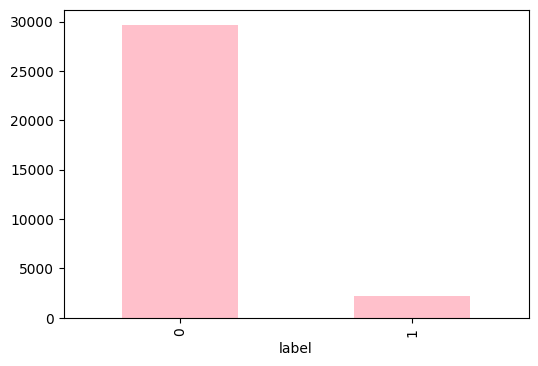

In [81]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

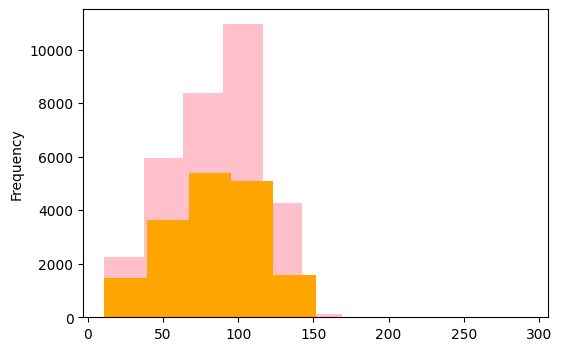

In [82]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [83]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [84]:

train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

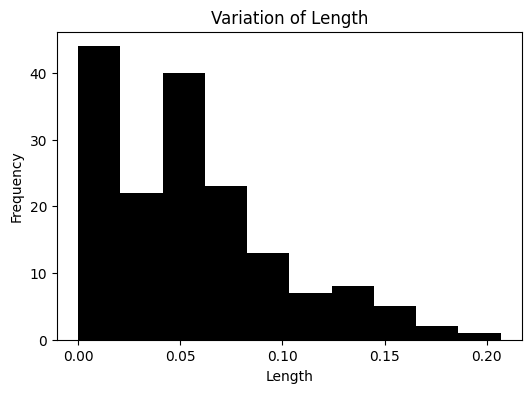

In [85]:


# Ensure 'len' is a numeric column (if not, calculate it, e.g., as the length of each tweet)
if 'len' not in train.columns:
    train['len'] = train['text_column'].apply(len)  # Replace 'text_column' with the actual column name containing text

# Group by 'len' and calculate the mean of 'label'
train.groupby('len')['label'].mean().plot.hist(color='black', figsize=(6, 4))

# Add titles and labels
plt.title('Variation of Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

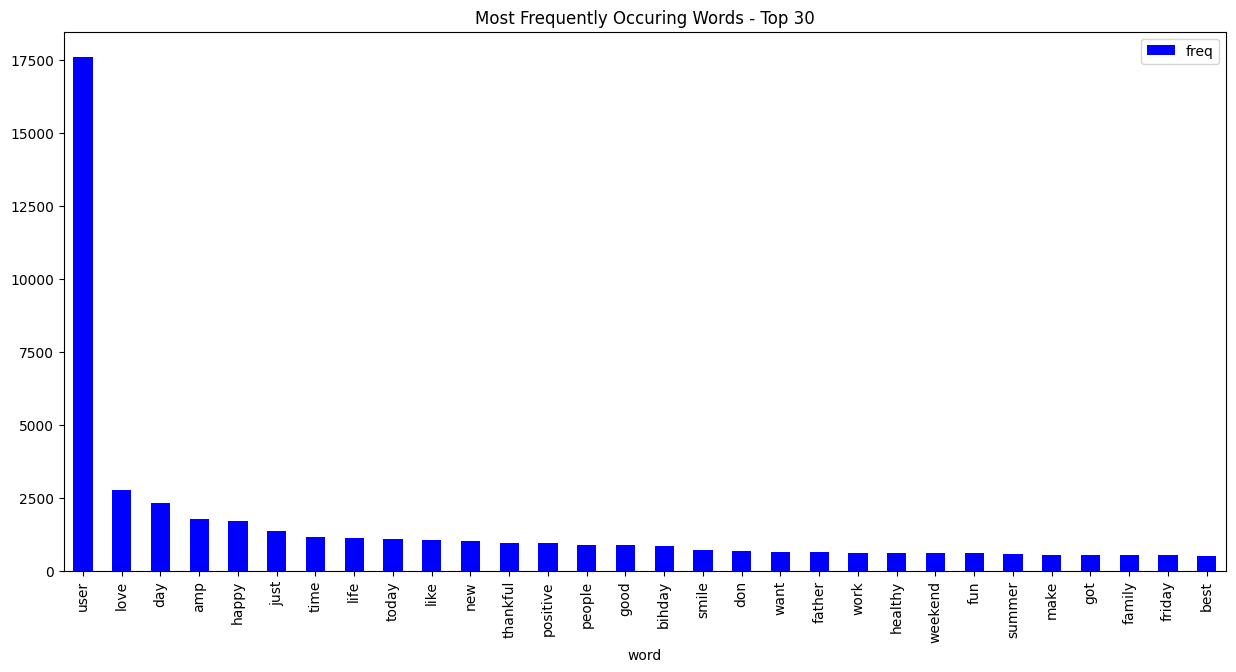

In [86]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

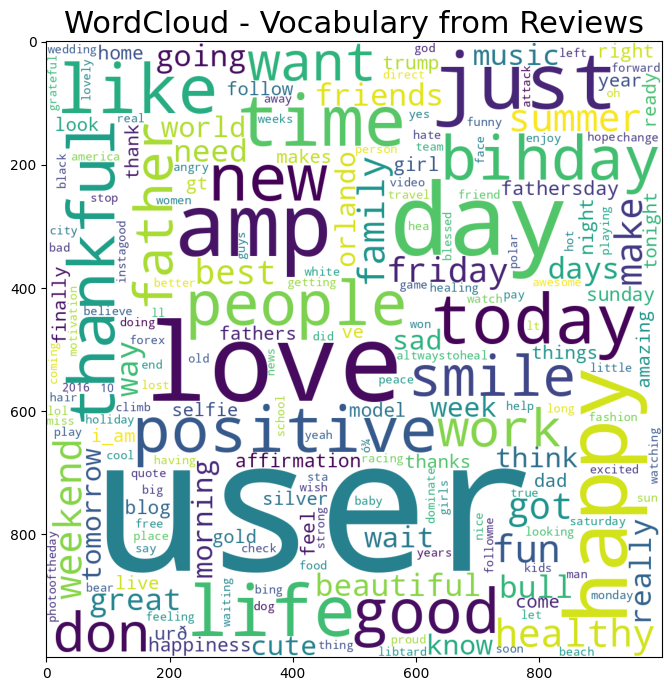

In [87]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

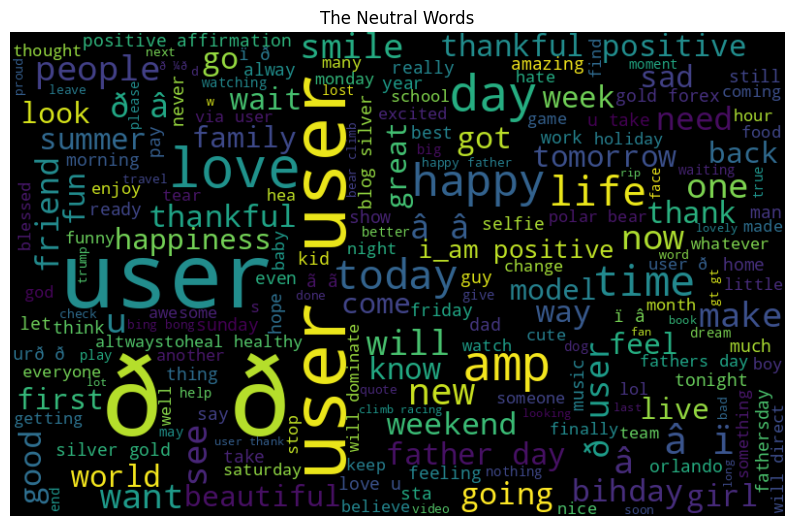

In [88]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


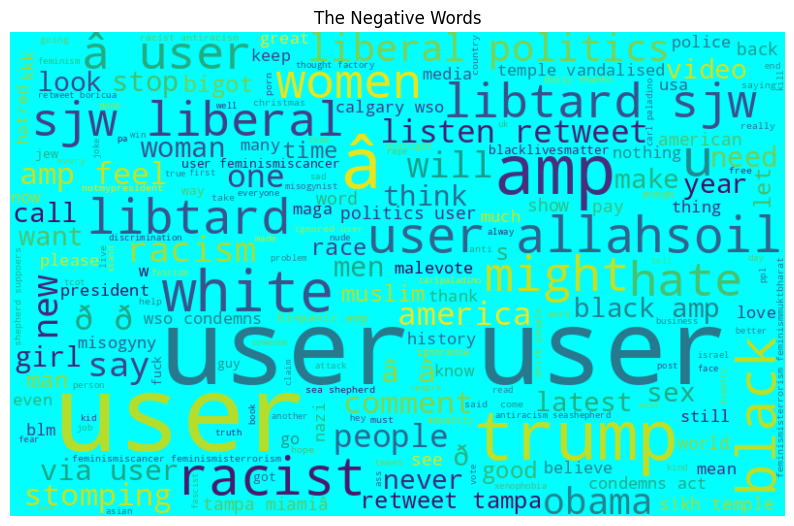

In [89]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [90]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [91]:
import re

# Function to extract hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# Extracting hashtags from non-racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# Extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# Unnesting list of hashtags
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


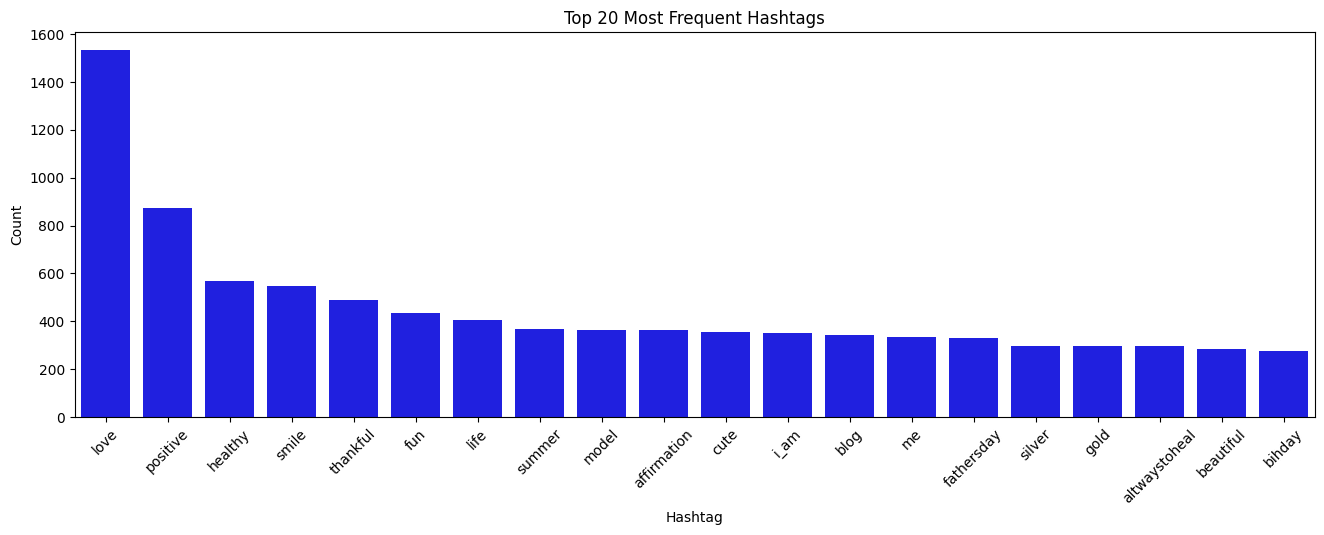

In [92]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure nltk is imported
nltk.download('punkt')  # Download any necessary nltk data, if needed

# Calculate frequency distribution of hashtags
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# Selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)

# Plotting
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count", color='blue')
ax.set(ylabel='Count')
plt.xticks(rotation=45)  # Rotate x labels for readability
plt.title("Top 20 Most Frequent Hashtags")
plt.show()


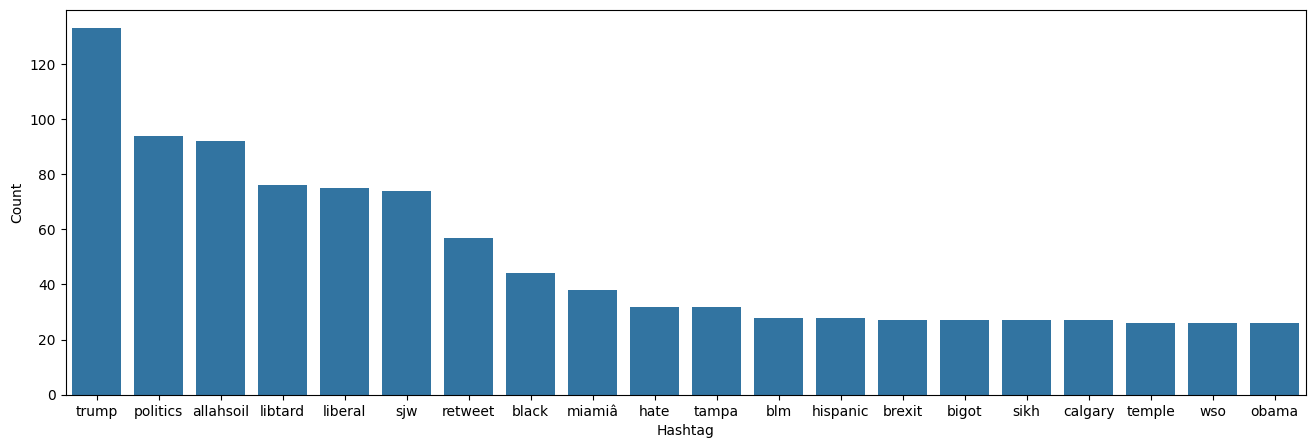

In [93]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [94]:
# Import gensim and necessary libraries
import gensim
import pandas as pd

# Assuming `train` DataFrame is loaded and `tokenized_tweet` is defined
# Ensure `tokenized_tweet` is in the correct format (list of tokenized tweets)
if 'tweet' in train.columns:
    # Tokenize tweets if not already tokenized
    tokenized_tweet = [tweet.split() for tweet in train['tweet']]

    # Create the Word2Vec model
    model_w2v = gensim.models.Word2Vec(
        tokenized_tweet,
        vector_size=200,  # Use 'vector_size' instead of 'size'
        window=5,
        min_count=2,
        sg=1,  # 1 for skip-gram model
        hs=0,
        negative=10,  # for negative sampling
        workers=2,  # Number of cores
        seed=34
    )

    # Train the model
    model_w2v.train(tokenized_tweet, total_examples=len(tokenized_tweet), epochs=20)

    # Print confirmation and check model
    print("Word2Vec model created and trained successfully.")
    print("Most similar words to 'example':", model_w2v.wv.most_similar('example'))
else:
    print("Error: 'tweet' column not found in train DataFrame.")


Word2Vec model created and trained successfully.
Most similar words to 'example': [('#religiouspsychosis', 0.7980408072471619), ('foolish', 0.6757098436355591), ('death.', 0.6738028526306152), ('deadly', 0.6666802763938904), ('ideology', 0.6575431823730469), ('relations', 0.6570018529891968), ('bombs,', 0.6462379693984985), ('epidemic', 0.6443227529525757), ('cars,', 0.6442259550094604), ('politics!', 0.6436553597450256)]


In [95]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6171038150787354),
 ('#prosecco', 0.6095384359359741),
 ('#boardgames', 0.6029834747314453),
 ('enroute', 0.5983767509460449),
 ('bay.', 0.5974839329719543),
 ('ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»â\x9d¤ï¸\x8fâ\x9d¤ï¸\x8f',
  0.5871264338493347),
 ('#demoday', 0.5847686529159546),
 ('#marbs', 0.583564281463623),
 ('podium', 0.579003632068634),
 ('roast', 0.5761442184448242)]

In [96]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7114004492759705),
 ('ownership', 0.7094475626945496),
 ('disregard', 0.7038175463676453),
 ('law.', 0.6980787515640259),
 ('level.', 0.6953598856925964),
 ('tolerance', 0.6918962597846985),
 ('extremist', 0.6914098262786865),
 ('rights,', 0.6904257535934448),
 ('#merica', 0.6892995238304138),
 ('solution', 0.6870662569999695)]

In [97]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7142857909202576),
 ('mytraining', 0.7009146809577942),
 ('training"', 0.6908668875694275),
 ('app,', 0.6274238228797913),
 ('"my', 0.6067715883255005),
 ('app', 0.5993845462799072),
 ('heroku', 0.5747326016426086),
 ('#expressjs', 0.5717299580574036),
 ('#nodejs', 0.566329300403595),
 ("domino's", 0.564696192741394)]

In [98]:
model_w2v.wv.most_similar(negative = "hate")

[('â\x9c\x88ï¸\x8f', 0.04722606763243675),
 ('yay!', 0.016775183379650116),
 ('#fridayfeeling', 0.011224640533328056),
 ('#community', 0.011141342110931873),
 ('ð\x9f\x8d»', 0.01091381162405014),
 ('street,', 0.010307551361620426),
 ('#australia', 0.0054266019724309444),
 ('#hungry', -0.0012079811422154307),
 ('de', -0.0015372191555798054),
 ('#wow', -0.0023838416673243046)]

In [99]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

# Example of how to use TaggedDocument with tokenized data
tagged_data = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(tokenized_tweet)]


In [101]:
# Import necessary library from gensim
from gensim.models.doc2vec import TaggedDocument

# Check that tokenized_tweet is properly defined as a list of tokenized tweets
if isinstance(tokenized_tweet, list) and all(isinstance(tweet, list) for tweet in tokenized_tweet):
    # Define function to label each tweet
    def add_label(twt):
        output = []
        for i, s in enumerate(twt):  # use enumerate for indexing
            output.append(TaggedDocument(words=s, tags=["tweet_" + str(i)]))
        return output

    # Label all tweets
    labeled_tweets = add_label(tokenized_tweet)

    # Display first 6 labeled tweets
    print(labeled_tweets[:6])
else:
    print("Error: 'tokenized_tweet' should be a list of lists, where each sublist contains tokens from a tweet.")



[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']), TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']), TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']), TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']), TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']), TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'], tags

In [102]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [103]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [104]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [105]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [106]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [107]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [108]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [110]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import numpy as np

# Check if x_train, x_valid, y_train, and y_valid are defined and in the correct format
if all(isinstance(var, np.ndarray) for var in [x_train, x_valid, y_train, y_valid]):
    # Initialize and train the RandomForestClassifier
    model = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_valid)

    # Calculate and print training and validation accuracy
    print("Training Accuracy:", accuracy_score(y_train, model.predict(x_train)))
    print("Validation Accuracy:", accuracy_score(y_valid, y_pred))

    # Calculate and print F1 score
    print("F1 Score:", f1_score(y_valid, y_pred, average="weighted"))  # Use weighted average for multiclass

    # Generate and print confusion matrix
    cm = confusion_matrix(y_valid, y_pred)
    print("Confusion Matrix:\n", cm)
else:
    print("Error: Ensure x_train, x_valid, y_train, and y_valid are defined and are numpy arrays.")


Error: Ensure x_train, x_valid, y_train, and y_valid are defined and are numpy arrays.


In [111]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9852738725960536
Validation Accuracy : 0.9405581278938806
f1 score : 0.5865970409051349
[[7179  253]
 [ 222  337]]


In [112]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9327993993242397
f1 score : 0.5398457583547558
[[7139  293]
 [ 244  315]]


In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)